In [1]:
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#jupyter上で表示するためのおまじない
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import requests
import datetime
import pandas as pd
import csv

def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='bitflyerfx', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

df = daily_price_historical('BTC','JPY')
df.to_csv('bitflyerfx.csv')

In [3]:
res = np.array(df)
time_stamp = res[:, 7].reshape(len(res), 1)
close_price = res[:, 1].reshape(len(res), 1)
tmp_data = np.hstack((time_stamp, close_price))
data2 = pd.DataFrame(tmp_data, columns=['ds', 'y'])
data2.to_csv('bitflyerfx_close.csv', index=False)

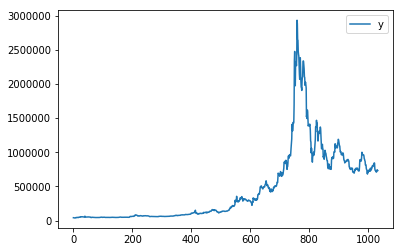

In [4]:
data3 = pd.read_csv("bitflyerfx_close.csv")
data3.plot()
plt.show()

In [5]:
from fbprophet import Prophet

model = Prophet()

In [6]:
model.fit(data3)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future_data = model.make_future_dataframe(periods=2400, freq='h')
forecast_data = model.predict(future_data) #予測

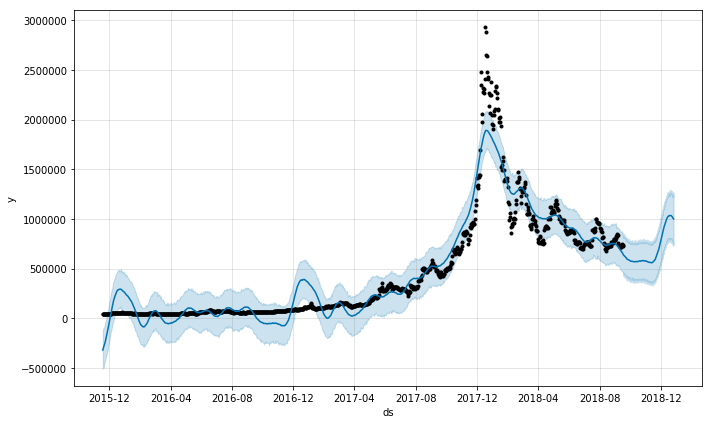

In [9]:
predicted = model.plot(forecast_data)
plt.show()